In [3]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar
import dust_size_dist as sizedist

from matplotlib.colors import LogNorm

import pickle

import yt
from yt.units import pc, kpc, second, Kelvin, gram, erg, cm

import MCMCFit as mcmc

%matplotlib inline

Loading the library to compute the charge distribution of dust grains.


In [4]:
filename = "TotaHeating_parametric_0pcent.pkl"
data_dir = "/home/jcibanezm/codes/run/PeHeat/ParametricHeating/"
pkl_file = open("%s%s"%(data_dir, filename))
heatDict = pickle.load(pkl_file)
pkl_file.close

<function close>

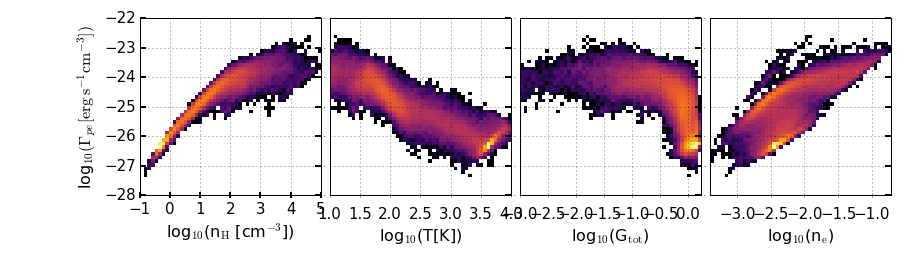

In [17]:
xsize = 12
ysize = 3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.15
wpad = 0.13
wwpad = 0.01

xs_panel = 0.84 / nfigs_x 
ys_panel = 0.82 / nfigs_y 

##########################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["nH"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 5.0],[-28, -22]])

ax.grid("on")
ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off
ax.set_ylabel("log$_{10} (\Gamma_{pe}[\mathrm{erg \, s}^{-1} \mathrm{cm}^{-3}])$", fontsize=16)
ax.set_xlabel("log$_{10}$(n$_{\mathrm{H}}$ [cm$^{-3}$])", fontsize=16)
ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["temp"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[1, 4],[-28, -22]])

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("log$_{10}$(T[K])", fontsize=16)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["Gtot"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, np.log10(1.7)],[-28, -22]])

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("log$_{10}$(G$_{\mathrm{tot}}$)", fontsize=16)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["new_ne"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[np.log10(np.min(heatDict["new_ne"])), np.log10(np.max(heatDict["new_ne"]))],[-28, -22]])

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("log$_{10}$(n$_{\mathrm{e}}$)", fontsize=16)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)


fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric.df", format="pdf")

fig.show()


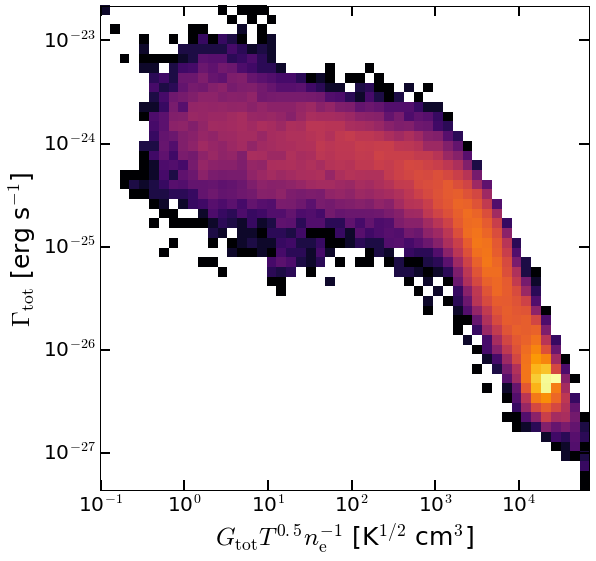

In [27]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes([0.14, 0.11, 0.85, 0.84])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (heatDict["Gtot"])*np.sqrt(heatDict["temp"])/heatDict["new_ne"]

ax.hist2d(np.log10(GTn), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno")

#ax.set_ylabel("T [K]", fontsize=25)
#
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=20, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=20, direction="in")


#ax.set_ylim(-0.9, 4.99)
ax.set_ylabel("$\Gamma_{\mathrm{tot}}$ [erg s$^{-1}$]", fontsize=25)
ax.set_xlabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=25)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric_GTn.df", format="pdf")


fig.show()